In [1]:
import pandas as pd
import math as mt
import numpy as np

from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from scipy import stats as st
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
ddt = [
    [1, 'kot', 2, 'a'],
    [2, 'dog', 3, 'b'],
    [3, 'krolik', 2, 'c'],
    [4, 'dog', 2, 'd'],
    [5, 'voron', 2, 'e'],
    [6, 'krolik', 4, 'f'],
    [7, 'dog', 5, 'g'],
    [8, 'voron', 6, 'h'],
    [9, 'krolik', 7, 'k'],
    [10, 'kot', 33, 'l']
]

In [3]:
columns = ['nomer', 'name', 'age', 'bukva']

In [4]:
dat = pd.DataFrame(ddt, columns=columns)

In [5]:
dat

,nomer,name,age,bukva
0,1,kot,2,a
1,2,dog,3,b
2,3,krolik,2,c
3,4,dog,2,d
4,5,voron,2,e
5,6,krolik,4,f
6,7,dog,5,g
7,8,voron,6,h
8,9,krolik,7,k
9,10,kot,33,l


In [6]:
dat.groupby('name').sum()

,nomer,age
name,,
dog,13,10
kot,11,35
krolik,18,13
voron,13,8


In [7]:
#попытка захреначить ml на синтетических данных

In [8]:
x=1

In [9]:
y1 = np.sin(x)
y1

0.8414709848078965

In [10]:
e1 = pd.DataFrame(np.arange(200), columns=['pr1'])

In [11]:
e1

,pr1
0,0
1,1
2,2
3,3
4,4
...,...
195,195
196,196
197,197
198,198


In [12]:
np.random.uniform(5,10)

7.724746022678

In [13]:
e1['pr2'] = e1['pr1'].apply(lambda x: 100*np.sin(x/20) + np.random.uniform(-20,20))

In [14]:
e1

,pr1,pr2
0,0,11.248019
1,1,21.576921
2,2,8.453373
3,3,1.855365
4,4,6.581321
...,...,...
195,195,-48.940589
196,196,-20.263007
197,197,-53.510753
198,198,-37.540902


<AxesSubplot:xlabel='pr1', ylabel='pr2'>

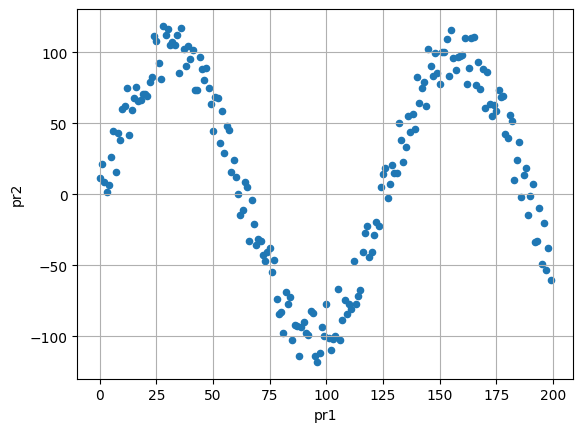

In [15]:
e1.plot(x='pr1', y='pr2', kind='scatter', grid=True, alpha=1)

In [16]:
e1['target'] = 0

In [17]:
e1

,pr1,pr2,target
0,0,11.248019,0
1,1,21.576921,0
2,2,8.453373,0
3,3,1.855365,0
4,4,6.581321,0
...,...,...,...
195,195,-48.940589,0
196,196,-20.263007,0
197,197,-53.510753,0
198,198,-37.540902,0


In [18]:
e2 = pd.DataFrame(np.arange(200), columns=['pr1'])

In [19]:
e2['pr2'] = e2['pr1'].apply(lambda x: 50+100*np.sin(x/20) + np.random.uniform(-20,20))

<AxesSubplot:xlabel='pr1', ylabel='pr2'>

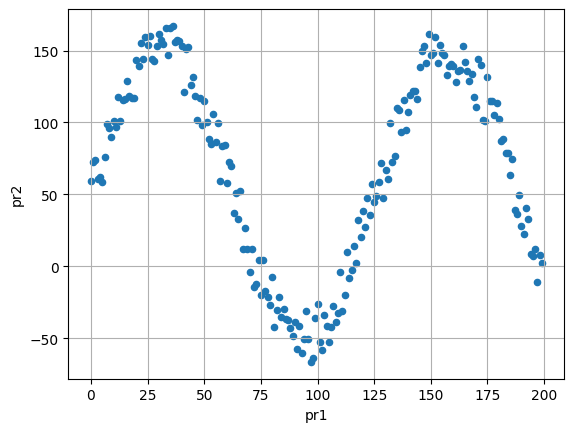

In [20]:
e2.plot(x='pr1', y='pr2', kind='scatter', grid=True, alpha=1)

In [21]:
e2['target'] = 1

In [22]:
e2

,pr1,pr2,target
0,0,59.131689,1
1,1,72.652858,1
2,2,74.221360,1
3,3,60.533216,1
4,4,62.404324,1
...,...,...,...
195,195,7.164297,1
196,196,11.855680,1
197,197,-10.950051,1
198,198,8.232402,1


In [23]:
e33 = pd.concat([e1, e2]).reset_index().drop('index', axis=1)

In [24]:
e33

,pr1,pr2,target
0,0,11.248019,0
1,1,21.576921,0
2,2,8.453373,0
3,3,1.855365,0
4,4,6.581321,0
...,...,...,...
395,195,7.164297,1
396,196,11.855680,1
397,197,-10.950051,1
398,198,8.232402,1


<AxesSubplot:xlabel='pr1', ylabel='pr2'>

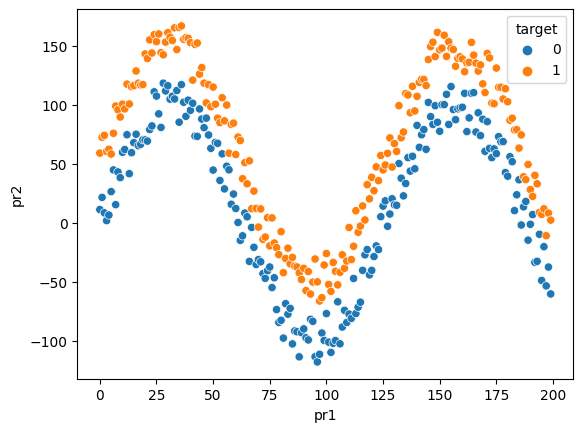

In [25]:
sns.scatterplot(data=e33, x='pr1', y='pr2', hue='target')

In [26]:
e33 = shuffle(e33, random_state=12345).reset_index()

In [27]:
e33

,index,pr1,pr2,target
0,378,178,105.096844,1
1,175,175,58.725718,0
2,396,196,11.855680,1
3,213,13,100.832357,1
4,110,110,-77.472308,0
...,...,...,...,...
395,34,34,112.273142,0
396,357,157,132.869708,1
397,382,182,88.775496,1
398,129,129,20.398767,0


<AxesSubplot:xlabel='pr1', ylabel='pr2'>

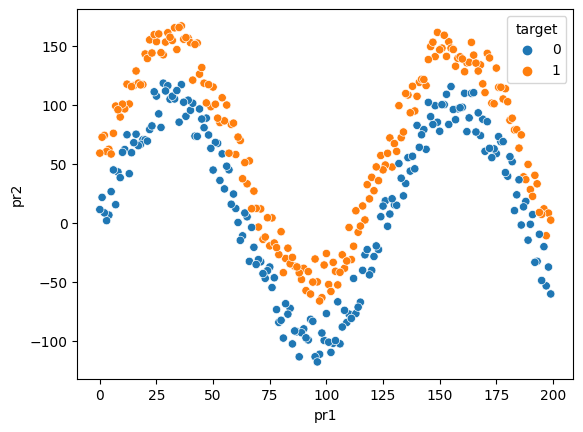

In [28]:
sns.scatterplot(data=e33, x='pr1', y='pr2', hue='target')

In [29]:
#подготовка фрейма, отделение целевого и обучающего признака

In [30]:
target = e33.target

In [31]:
features = e33[['pr1', 'pr2']]

In [32]:
target

0      1
1      0
2      1
3      1
4      0
      ..
395    0
396    1
397    1
398    0
399    1
Name: target, Length: 400, dtype: int64

In [33]:
features

,pr1,pr2
0,178,105.096844
1,175,58.725718
2,196,11.855680
3,13,100.832357
4,110,-77.472308
...,...,...
395,34,112.273142
396,157,132.869708
397,182,88.775496
398,129,20.398767


In [34]:
e33.corr()

,index,pr1,pr2,target
index,1.000000,4.999953e-01,0.261310,8.660281e-01
pr1,0.499995,1.000000e+00,-0.073244,3.922893e-17
pr2,0.261310,-7.324356e-02,1.000000,3.440204e-01
target,0.866028,3.922893e-17,0.344020,1.000000e+00


# модель дерево

In [35]:
#логарифмическая сетка параметров для модели Дерево
params = {
    'max_depth':[8,16,32], 
    'min_samples_split':[2,4], 
    'min_samples_leaf':[8,16]
}

In [36]:
dt = DecisionTreeClassifier(random_state=12345, class_weight='balanced')

In [37]:
clf = GridSearchCV(dt, params, scoring='f1', cv=5, n_jobs=-1)

In [38]:
%%time
clf.fit(features, target)

CPU times: user 156 ms, sys: 75 ms, total: 231 ms
Wall time: 3.52 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 32], 'min_samples_leaf': [8, 16],
                         'min_samples_split': [2, 4]},
             scoring='f1')

In [39]:
clf.best_score_

0.783825069001618

In [40]:
clf.best_params_

{'max_depth': 16, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [41]:
dt = DecisionTreeClassifier(random_state=12345,
                            max_depth=16,
                            min_samples_leaf=8,
                            min_samples_split=2,
                            class_weight='balanced')

In [42]:
dt.fit(features, target)

DecisionTreeClassifier(class_weight='balanced', max_depth=16,
                       min_samples_leaf=8, random_state=12345)

In [43]:
#проверочный датасет
a ={'pr1': [30, 30, 125, 125, 75, 75, 100, 100], 
    'pr2': [100, 150, 0, 50, -60, -10, -90, -40]}
test = pd.DataFrame(a)

In [44]:
test

,pr1,pr2
0,30,100
1,30,150
2,125,0
3,125,50
4,75,-60
5,75,-10
6,100,-90
7,100,-40


In [45]:
dt.predict(test)

array([0, 1, 0, 1, 0, 1, 0, 1])

<div class="alert alert-block alert-info">
    
модель - случайный лес

In [46]:
#логарифмическая сетка параметров для модели Случайный Лес
params = {
    'n_estimators':[40,80], 
    'max_depth':[16, 32], 
    'min_samples_split':[2], 
    'min_samples_leaf':[2]
}


In [47]:
rf = RandomForestClassifier(random_state=12345, class_weight='balanced')

In [48]:
clf = GridSearchCV(rf, params, scoring='f1', cv=5, n_jobs=-1)

In [49]:
%%time
clf.fit(features, target)

CPU times: user 202 ms, sys: 8.56 ms, total: 211 ms
Wall time: 3.55 s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [16, 32], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [40, 80]},
             scoring='f1')

In [50]:
clf.best_score_

0.8925990644390828

In [51]:
clf.best_params_

{'max_depth': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

In [52]:
model_rf = RandomForestClassifier(random_state=12345, 
                               class_weight='balanced', 
                               max_depth=16,
                               min_samples_leaf=2, 
                               min_samples_split=2, 
                               n_estimators=80
                              
                              )

In [53]:
%%time
model_rf.fit(features, target)

CPU times: user 287 ms, sys: 280 µs, total: 288 ms
Wall time: 322 ms


RandomForestClassifier(class_weight='balanced', max_depth=16,
                       min_samples_leaf=2, n_estimators=80, random_state=12345)

In [54]:
model_rf.predict(test)

array([0, 1, 0, 1, 0, 1, 0, 1])

<div class="alert alert-block alert-info">

модель - логистическая регрессия

In [55]:
#логарифмическая сетка параметров для модели Логистическая Регрессия
params = {
    'max_iter':[50,100], 
    'solver':[
              'lbfgs', 
              'newton-cg', 
              'liblinear', 
              'sag', 
              'saga'
             ]
}

In [56]:
lr = LogisticRegression(random_state=12345, class_weight='balanced')

In [57]:
clf = GridSearchCV(lr, params, scoring='f1', cv=5, n_jobs=-1)

In [58]:
%%time
clf.fit(features, target)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

CPU times: user 109 ms, sys: 4.5 ms, total: 114 ms
Wall time: 901 ms


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=12345),
             n_jobs=-1,
             param_grid={'max_iter': [50, 100],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [59]:
clf.best_score_

0.6218249655657907

In [60]:
clf.best_params_

{'max_iter': 100, 'solver': 'sag'}

In [61]:
m_lr = LogisticRegression(random_state=12345, 
                          max_iter=50, 
    solver='liblinear',
                          class_weight='balanced')

In [62]:
m_lr.fit(features,target)

LogisticRegression(class_weight='balanced', max_iter=50, random_state=12345,
                   solver='liblinear')

In [63]:
m_lr.predict(test)

array([1, 1, 0, 1, 0, 0, 0, 0])

<div class="alert alert-block alert-info">

модель - SVM

In [64]:
C_range = np.logspace(-2, 4, 7)#13)
gamma_range = np.logspace(-4, 2, 7)#13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [65]:
C_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

In [66]:
gamma_range

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [67]:
regr = svm.SVC()

In [68]:
clf = GridSearchCV(regr, param_grid=param_grid, cv=5, n_jobs=-1)

In [69]:
%%time
clf.fit(features, target)

CPU times: user 376 ms, sys: 29.5 ms, total: 405 ms
Wall time: 5.02 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [70]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (clf.best_params_, clf.best_score_)
)

The best parameters are {'C': 10000.0, 'gamma': 0.0001} with a score of 0.99


In [71]:
regr = svm.SVC(
    #kernel='rbf', 
    C=10000, 
    gamma=0.0001)

In [72]:
regr.fit(features, target)

SVC(C=10000, gamma=0.0001)

In [73]:
regr.predict(test)

array([0, 1, 0, 1, 0, 1, 0, 1])